In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',100)
plt.style.use('dark_background')

# READ FILE

In [6]:
games = pd.read_csv('video-game-sales.csv')
games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


File Size

In [7]:
print(games.shape)

(16598, 11)


In [8]:
len(games.Name.unique())

11493

Checking Missing Values

In [9]:
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
               ... 
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
Length: 11, dtype: int64

# DATASETS have 11 Coloums as:
Rank - Ranking od thr sales, integer

Name - The games name, object

Platform - Platform of the games release (i.e. PS4,XBOX,PC etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales


# What Genre Games Has Made Most

In [10]:
games['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
                ... 
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, Length: 12, dtype: int64

# Total Platfrom Games Launched

In [11]:
print(games['Platform'].value_counts().head(5))
print(games['Platform'].nunique())


DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64
31


# Total Publisher

In [12]:
print(games['Publisher'].value_counts().head())
print(games['Publisher'].nunique())


Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: Publisher, dtype: int64
578


# Games Launched By Electronic Arts

In [13]:
Publisher_get = games.groupby(['Publisher'])
Publisher_get.get_group('Electronic Arts')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002.0,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16384,16387,Poker for Dummies,PC,2008.0,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16413,16416,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
16539,16542,Spore Galactic Adventures,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


# Total Genre

In [14]:
print(games['Genre'].value_counts().head(5))
print(games['Genre'].nunique())

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64
12


# Most popular game, genre, publisher, and platform of NA,EU & JP

In [15]:
regionals = ['NA_Sales', 'EU_Sales', 'JP_Sales']
aspects = ['Platform', 'Genre', 'Publisher']
for i in regionals:
    for j in aspects:
        k = games.groupby(j)[i].sum().sort_values(ascending=False).head(1)
        display(k)

Platform
X360    601.05
Name: NA_Sales, dtype: float64

Genre
Action    877.83
Name: NA_Sales, dtype: float64

Publisher
Nintendo    816.87
Name: NA_Sales, dtype: float64

Platform
PS3    343.71
Name: EU_Sales, dtype: float64

Genre
Action    525.0
Name: EU_Sales, dtype: float64

Publisher
Nintendo    418.74
Name: EU_Sales, dtype: float64

Platform
DS    175.57
Name: JP_Sales, dtype: float64

Genre
Role-Playing    352.31
Name: JP_Sales, dtype: float64

Publisher
Nintendo    455.42
Name: JP_Sales, dtype: float64

# Most popular game in each region

In [16]:
for i in regionals:
    display(games.sort_values(by=[i], ascending=False).head(2))

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10


 a games launched on diffrent platform in diffrent year

In [19]:
games_title = games.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
games_title.Name = games_title.Name.astype(np.int64)

games_title = games_title.sort_values(['Name'], ascending=False)
games_title.columns = ['Platform']
games_title

ValueError: 'Name' is both an index level and a column label, which is ambiguous.

In [ ]:
cols = ['Name','Platform','Year','Publisher']
games.loc[games.Name=='FIFA 14', cols].sort_values(['Year'])

,Name,Platform,Year,Publisher
112,FIFA 14,PS3,2013.0,Electronic Arts
256,FIFA 14,X360,2013.0,Electronic Arts
493,FIFA 14,PS4,2013.0,Electronic Arts
1698,FIFA 14,XOne,2013.0,Electronic Arts
3988,FIFA 14,PSV,2013.0,Electronic Arts
4503,FIFA 14,PC,2013.0,Electronic Arts
4538,FIFA 14,Wii,2013.0,Electronic Arts
6661,FIFA 14,3DS,2013.0,Electronic Arts
7034,FIFA 14,PSP,2013.0,Electronic Arts


# Most Popular Platform

C:\Users\Paul.Ronen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Platform


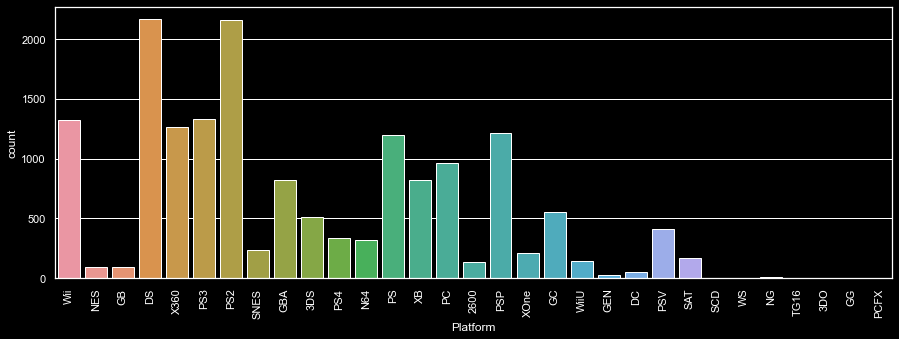

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(games['Platform'])
plt.xticks(rotation=90)
print('Platform')

# In which Platfrom Which Type Of Game Launched

In [ ]:
platGenre = pd.crosstab(games.Platform,games.Genre)
platGenre.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


# Which Genre Games Launch Most💸↗

Genre


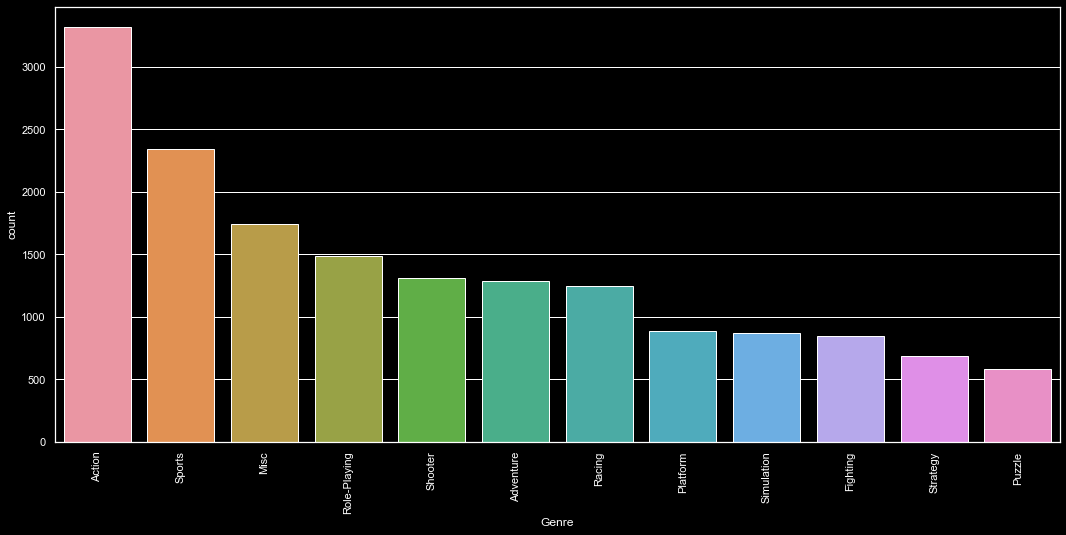

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(x="Genre", data=games, order = games['Genre'].value_counts().index)
plt.xticks(rotation=90)
print('Genre')

 # Year in Which Most Game Launched
 

Year Name


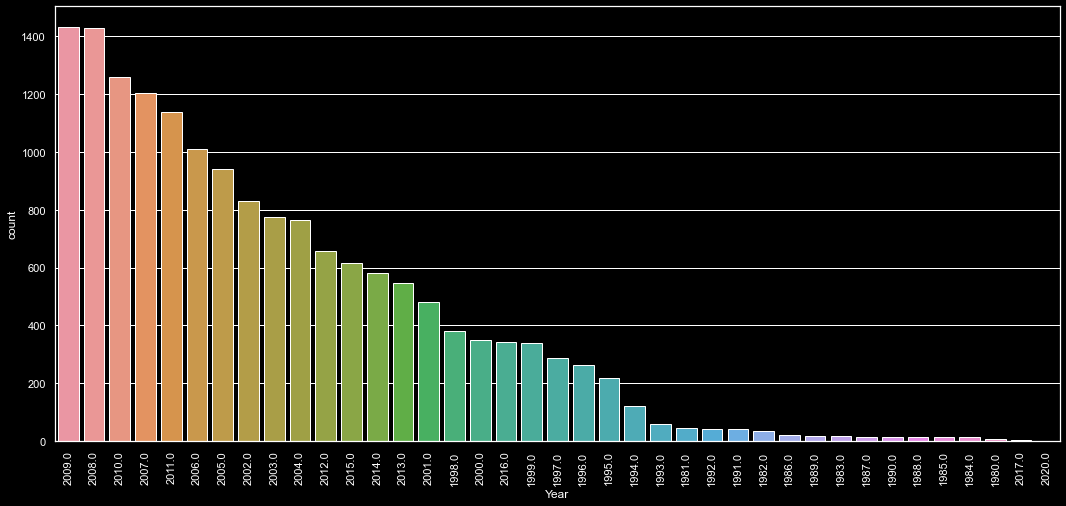

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(x="Year", data=games, order = games.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
print('Year','Name')

# Higest Sale World Wide

In [ ]:
games.sort_values(by=['Global_Sales'], ascending=False)
games = games.groupby(by=['Year'])['Global_Sales'].sum()
games = games.reset_index()

Global_Sales


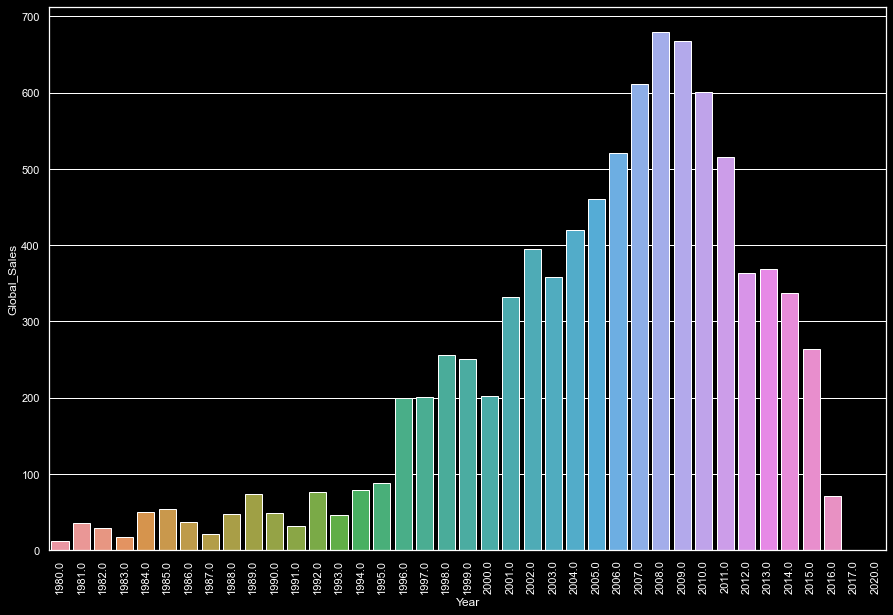

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Year', y='Global_Sales', data=games)
plt.xticks(rotation=90)
print('Global_Sales')

# Most Globally Sold Game

In [ ]:
top = pd.DataFrame(games.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
top.head(10)

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Black Ops,31.03
8,Call of Duty: Modern Warfare 3,30.83
9,New Super Mario Bros.,30.01


# Comparing Sales in different regions and global Sales

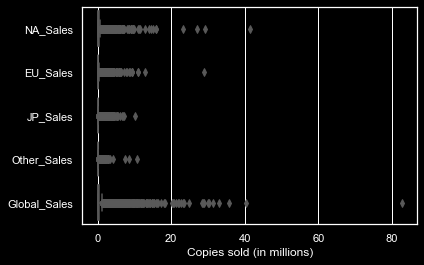

In [ ]:
vg = games[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
plt.xlabel("Copies sold (in millions)")
ax = sns.boxplot(data=vg, orient="h", palette="Set2")

# A simple pie chart to show sales in different regions

In [ ]:
regional_sales = [games.NA_Sales.sum(),games.EU_Sales.sum(),games.JP_Sales.sum(),games.Other_Sales.sum()]
regions = ['NA','EU','JP','Others']
explode = (0.02,0.02,0.02,0.02)

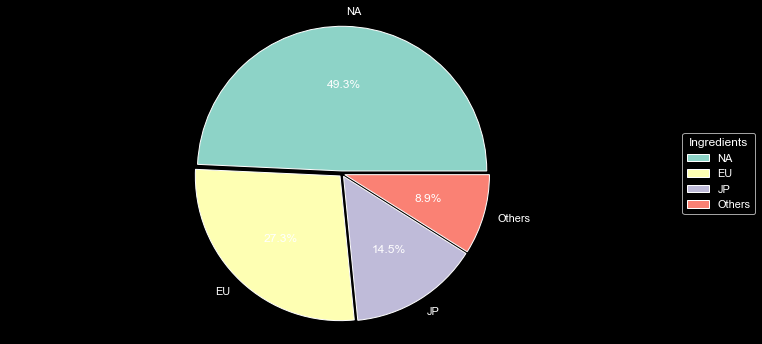

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(regional_sales,explode = explode,labels=regions,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(regions,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# Plot pairwise relationships in a dataset.

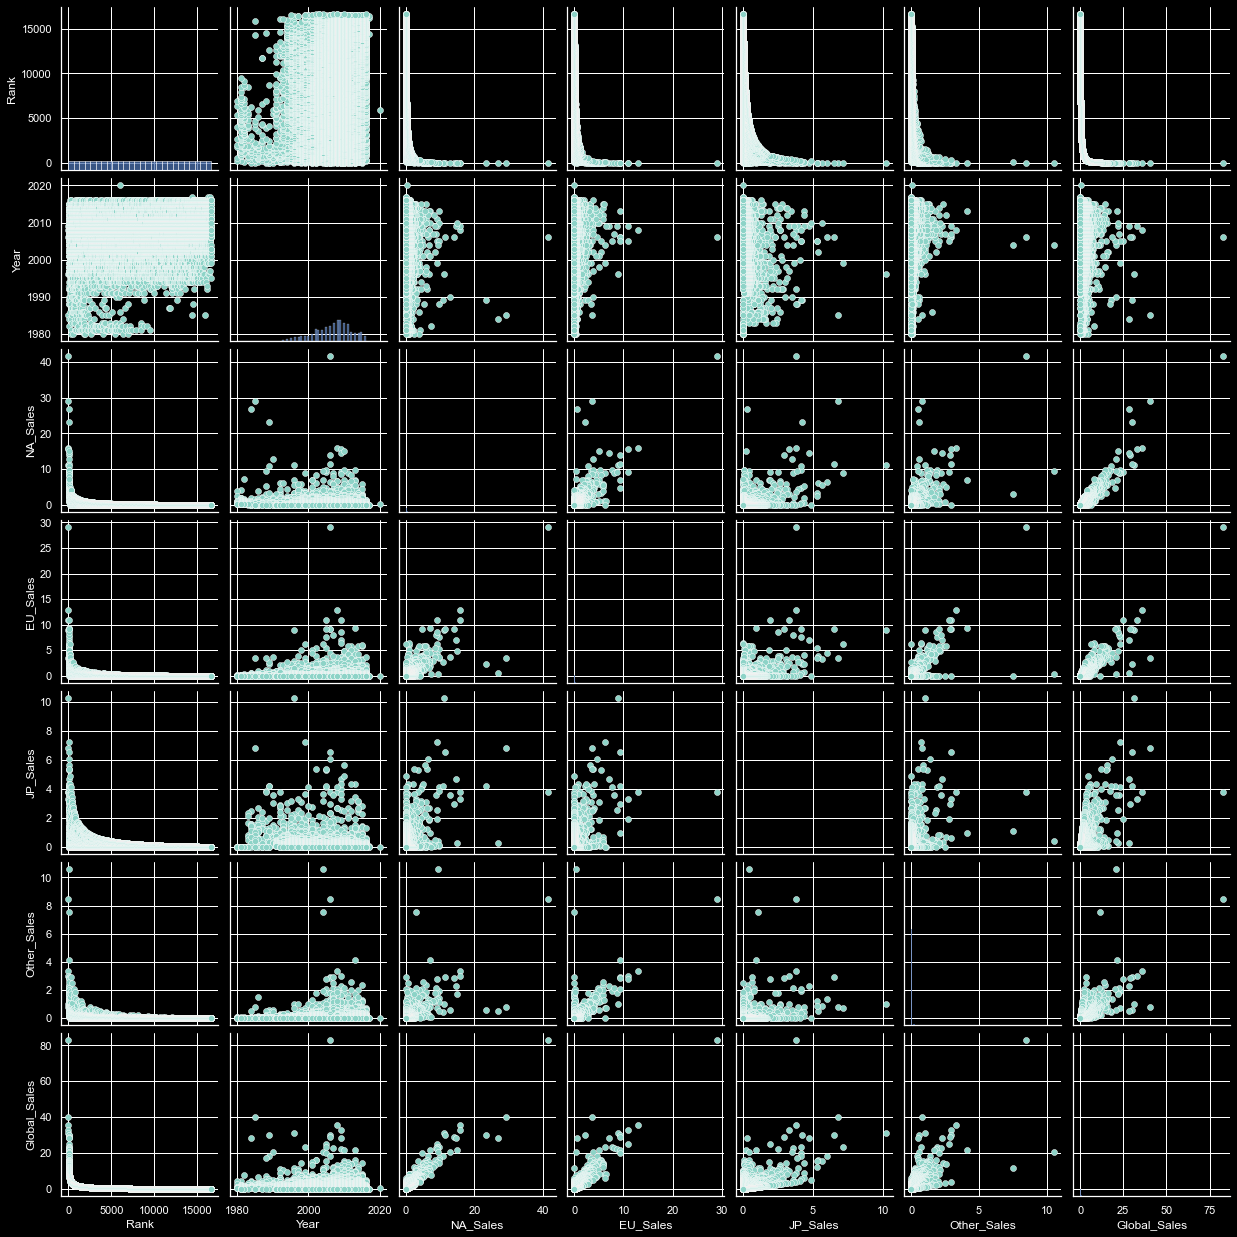

In [ ]:
sns.pairplot(games)